## This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

### The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

### ID - Unique number for each athlete , Name - Athlete's name , Sex - M or F ,  Age - Integer  , Height - In centimeters , Weight - In kilograms ,  Team - Team name , NOC - National Olympic Committee 3-letter code Games - Year and season , Year - Integer , Season - Summer or Winter , City - Host city , Sport - Sport , Event - Event , Medal - Gold, Silver, Bronze, or NA

### Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## What I’ll do first is load the data with Pandas, and check its Null Values and size.

In [3]:
data = pd.read_csv("athlete_events.csv")

In [4]:
data1 = pd.read_csv("noc_regions.csv")

### See data in tabular form using head().


In [5]:
data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [6]:
data1.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


### we want to find out if there are any null values in columns. Check using pandas’ isnull()

In [7]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
data1.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

### Overall summary of DataFrame



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### From the above data its clearly evident that "Age", "Height", "Weight" and "Medal" are the only columns that have missing values. But, missing values in "Medal" column doesn't mean the actual missing values. It might be mostly due to the players who didn't win any medal for the particular even. Therefore, while imputing the values its recommended to impute values only to "Age", "Height" and "Weight" columns in the dataset.

### Fill missing age ,height ,weight values with average age ,height ,weight  of other athletes.

In [10]:
data["Age"].mean()

25.556898357297374

In [11]:
data["Height"].mean()

175.33896987366376

In [12]:
data["Weight"].mean()

70.70239290053351

In [13]:
data["Age"].fillna((data["Age"].mean()), inplace = True)
data["Height"].fillna((data["Height"].mean()), inplace = True)
data["Weight"].fillna((data["Weight"].mean()), inplace = True)



In [14]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### We can check here that now the value of height, age and width is not missing.

In [15]:
data.shape

(271116, 15)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Joining the dataframes

### We can now join the two dataframes using as key the NOC column with the Pandas 'Merge' function

In [17]:
olympics = pd.merge(data, data1, on='NOC', how='left')

In [18]:
olympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.00000,82.000000,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.00000,82.000000,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


In [19]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [20]:
missing_index = olympics.loc[olympics.region.isnull()].index

In [21]:
missing_index

Int64Index([   578,    579,   2719,   6267,   7659,   7660,   7661,   7662,
              7663,   7664,
            ...
            265778, 265972, 266550, 266551, 268673, 268752, 268753, 268993,
            268994, 269455],
           dtype='int64', length=370)

In [22]:
olympics.loc[olympics.region.isnull()].NOC.value_counts()

SGP    349
ROT     12
TUV      7
UNK      2
Name: NOC, dtype: int64

### Looking at their 'Team' names we can manually insert the correct values into the olympics data.

In [23]:

old_c = olympics.loc[olympics.region.isnull(),:].NOC.value_counts().index

In [24]:
old_c

Index(['SGP', 'ROT', 'TUV', 'UNK'], dtype='object')

In [25]:
mapper = pd.Series(index=old_c, name ='region',data = ['Singapore','Rotorua','Tuvalu','Uganda'])

In [26]:
mapper

SGP    Singapore
ROT      Rotorua
TUV       Tuvalu
UNK       Uganda
Name: region, dtype: object

In [27]:
olympics.loc[missing_index,'NOC'].map(mapper)

578       Singapore
579       Singapore
2719      Singapore
6267        Rotorua
7659      Singapore
            ...    
268752    Singapore
268753    Singapore
268993    Singapore
268994    Singapore
269455    Singapore
Name: NOC, Length: 370, dtype: object

In [28]:
olympics.region.fillna(olympics.NOC.map(mapper), inplace = True)

In [29]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region         0
notes     266077
dtype: int64

In [30]:
olympics.drop(columns = 'notes', inplace = True)

In [31]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  271116 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 43.2+ MB


# Distribution of the age of gold medalists

### Let’s start creating a new data frame including only gold medalists

In [32]:
goldMedals = olympics[(olympics.Medal == 'Gold')].reset_index().drop(columns = 'index')
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
2,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
3,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
4,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway


In [33]:
goldMedals.shape

(13372, 16)

In [34]:
goldMedals1 = goldMedals[np.isfinite(goldMedals['Age'])]

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Gold Medals')

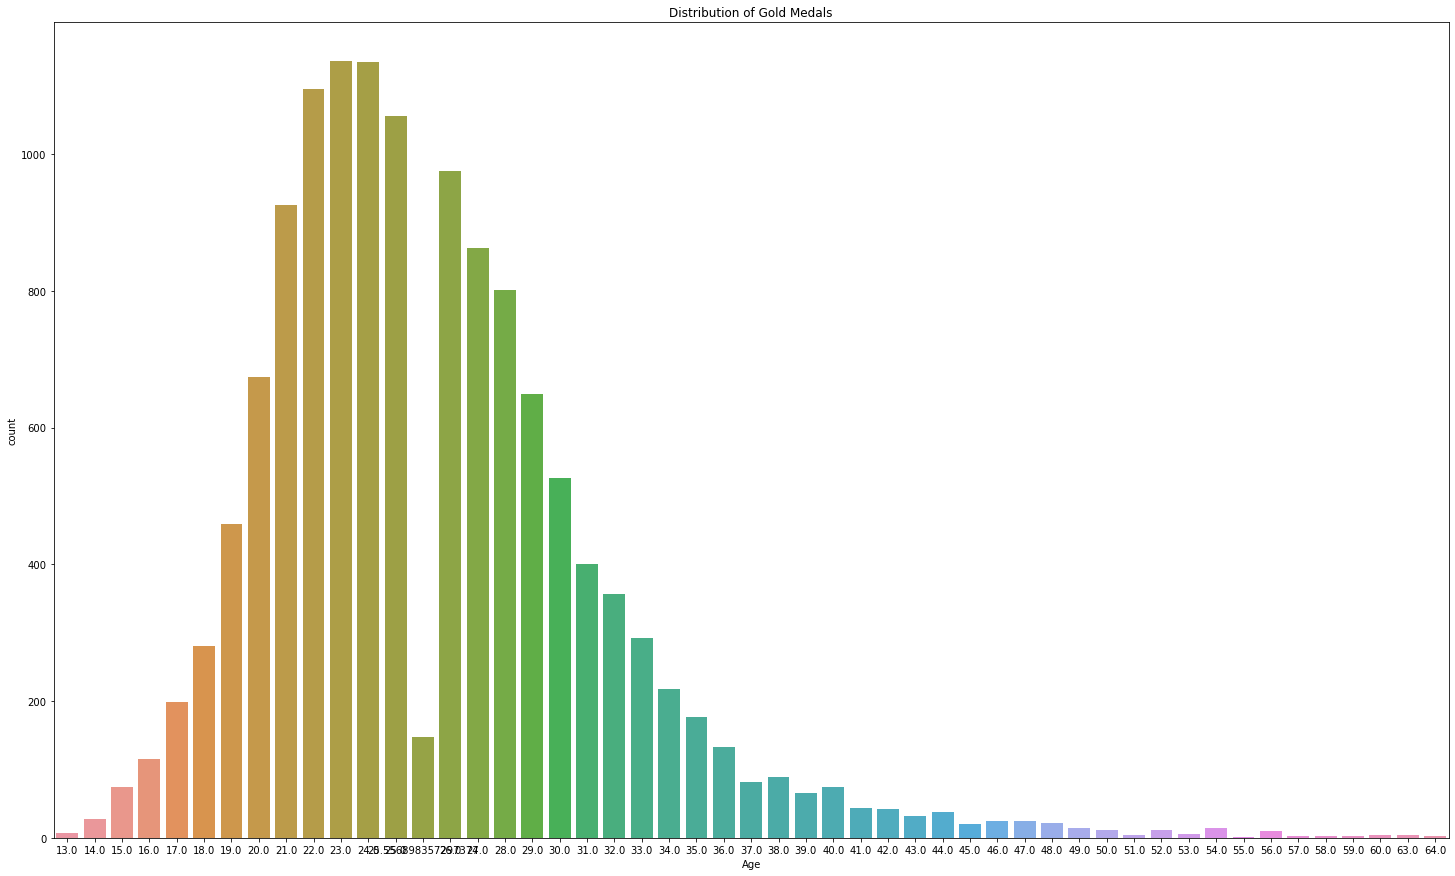

In [35]:
plt.figure(figsize=(25, 15))
plt.tight_layout()
sns.countplot(goldMedals1['Age'])
plt.title('Distribution of Gold Medals')

## Median height/weight of an Olympic medalist

### Let’s try to plot a scatterplot of height vs weight to see the distribution of values 

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

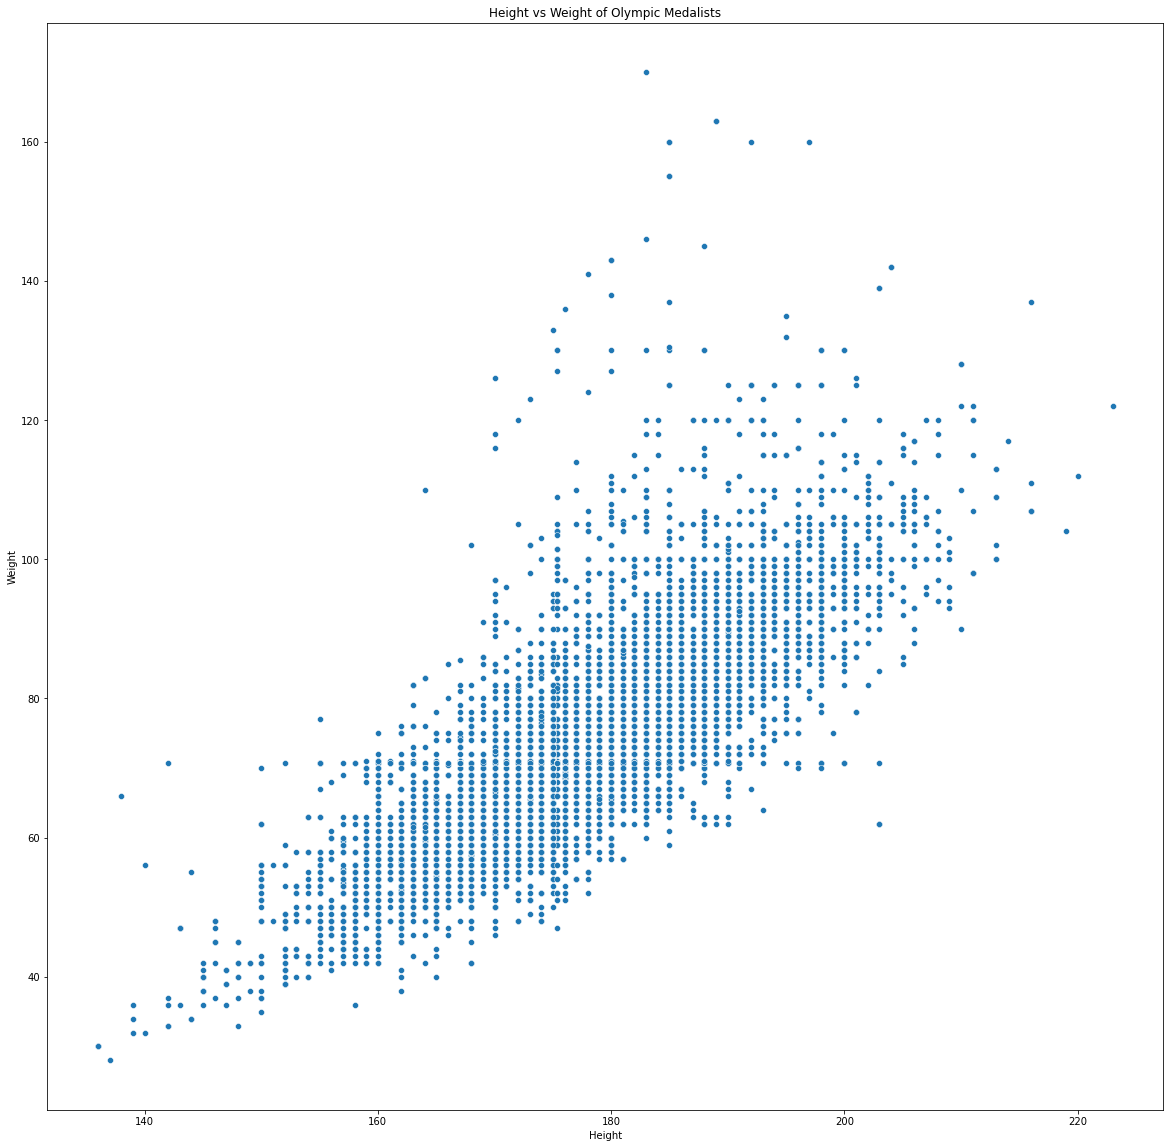

In [36]:
plt.figure(figsize=(20, 20))
ax = sns.scatterplot(x="Height", y="Weight", data=goldMedals ,marker='o')
plt.title('Height vs Weight of Olympic Medalists')

## Top 15 sports play by the athletes with the highest numbers of participants

In [37]:
g1 = olympics['Sport']

In [38]:
g1

0            Basketball
1                  Judo
2              Football
3            Tug-Of-War
4         Speed Skating
              ...      
271111             Luge
271112      Ski Jumping
271113      Ski Jumping
271114        Bobsleigh
271115        Bobsleigh
Name: Sport, Length: 271116, dtype: object

In [39]:
g2=g1.value_counts().head(15)

In [40]:
l1=g2.index

In [41]:
l2=g2.values

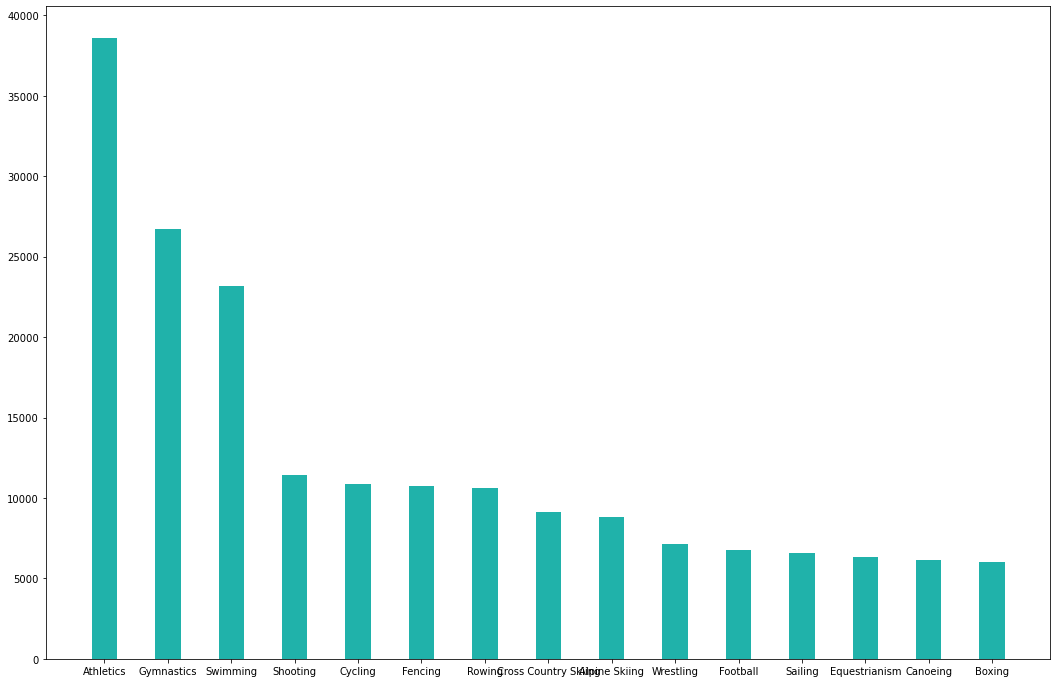

In [42]:
plt.figure(figsize=(18,12))
plt.bar(x=l1, height=l2, width=0.4 ,color = "#20B2AA");

### Sports like Athletics, Gymnastics, Swimming, Shooting, Cycling, Fencing, Rowing, Cross Country Skiing, Alpine Skiing, Wrestling where the top 10 sports play by the athletes with the highest numbers of participants, that goes from 400k to 7k athletes.

## Gold medals won by women

In [43]:
Women_goldMedals = goldMedals[(goldMedals.Sex == 'F')]
Women_goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
8,21,Ragnhild Margrethe Aamodt,F,27.0,163.00000,70.702393,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
26,150,Margaret Ives Abbott (-Dunne),F,23.0,175.33897,70.702393,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA
61,832,Nicola Virginia Adams,F,29.0,164.00000,51.000000,Great Britain,GBR,2012 Summer,2012,Summer,London,Boxing,Boxing Women's Flyweight,Gold,UK
62,832,Nicola Virginia Adams,F,33.0,164.00000,51.000000,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,UK
64,846,Valerie Kasanita Adams-Vili (-Price),F,23.0,193.00000,120.000000,New Zealand,NZL,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,Gold,New Zealand


In [44]:
Women_goldMedals.describe()

,ID,Age,Height,Weight,Year
count,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000
mean,71230.252202,24.373544,171.009991,64.062381,1992.001068
std,39603.057840,5.219615,8.895301,10.736609,21.632271
min,21.000000,13.000000,136.000000,28.000000,1900.000000
25%,36731.000000,21.000000,165.000000,57.000000,1980.000000
50%,70636.000000,24.000000,172.000000,64.000000,1998.000000
75%,107434.500000,27.000000,176.000000,70.702393,2008.000000
max,135553.000000,63.000000,210.000000,136.000000,2016.000000


In [45]:
Women_goldMedals.describe().ID.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

### Here we can see that 3347 women have won the gold medals and their average age is 24 years, their average height is 171 cm and their average weight is 64 cm. If we talk about age, then there are 13 minimum and maximum of 63 .

## Top 15 Countries with the highest Gold Medal number

In [47]:
goldMedals.region.value_counts().reset_index(name='Medals').head(15)

,index,Medals
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


In [48]:
cgm=goldMedals.region.value_counts().reset_index(name='Medals').head(15)


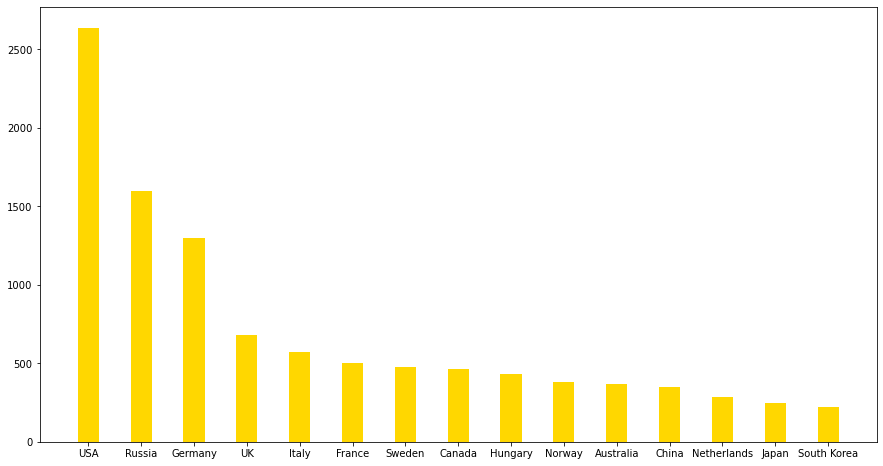

In [49]:
plt.figure(figsize=(15,8))

plt.bar(cgm['index'].values,cgm['Medals'].values,width=0.4 ,color = "#FFD700")
plt.show()



### Top 10 countries with more Golden Medals are USA, Russia, Germany, Great Britain, Italy, France, Sweden, Canada and greatly surprise with Hungary as well, with number of medals that goes from over 2500k to 500 medals.

## Gold medals win by India

In [50]:
goldMedalsIndia = goldMedals[goldMedals['NOC'] == 'IND']
goldMedalsIndia.head(40)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
172,2699,Shaukat Ali,M,30.000000,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
173,2703,Syed Mushtaq Ali,M,22.000000,165.00000,61.000000,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India
188,2864,Richard James Allen,M,25.000000,172.00000,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
189,2864,Richard James Allen,M,30.000000,172.00000,70.702393,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
190,2864,Richard James Allen,M,34.000000,172.00000,70.702393,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India
434,5618,Sardar Mohammad Aslam,M,25.556898,175.33897,70.702393,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
933,11197,Vasudevan Bhaskaran,M,29.000000,174.00000,68.000000,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India
979,11601,Abhinav Bindra,M,25.000000,173.00000,70.000000,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India
1137,12911,Lal Shah S. Bokhari,M,23.000000,173.00000,70.702393,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India
1356,15011,Frank Gerald Singlehurst Brewin,M,22.000000,175.33897,70.702393,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India


In [51]:
goldMedalsIndia.describe()

,ID,Age,Height,Weight,Year
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,76368.891304,25.670877,173.650447,68.974128,1948.637681
std,37617.652947,3.814860,4.617796,4.763861,17.360052
min,2699.000000,19.000000,159.000000,53.000000,1924.000000
25%,41709.250000,23.000000,173.000000,70.702393,1932.000000
50%,93686.000000,25.556898,175.338970,70.702393,1948.000000
75%,111054.750000,27.750000,175.338970,70.702393,1956.000000
max,133554.000000,36.000000,184.000000,83.000000,2008.000000


### We can see here that India has won 138 gold medals, the average age of the gold medal winners is 25 years and the minimum age is 19 years and the maximum age is 36 years.

## Sport In which India has won maximum gold medals

In [52]:
goldMedalsIndia.Event.value_counts().reset_index(name='Medal').head()

,index,Medal
0,Hockey Men's Hockey,130
1,Alpinism Mixed Alpinism,7
2,"Shooting Men's Air Rifle, 10 metres",1


In [53]:
gmi = goldMedalsIndia.Event.value_counts().reset_index(name='Medal').head()

In [54]:
gmi

,index,Medal
0,Hockey Men's Hockey,130
1,Alpinism Mixed Alpinism,7
2,"Shooting Men's Air Rifle, 10 metres",1


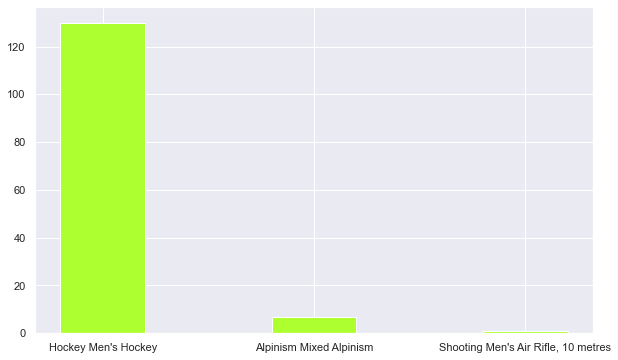

In [134]:
gmi = goldMedalsIndia.Event.value_counts().reset_index(name='Medal').head()
plt.figure(figsize=(10,6))


plt.bar(gmi['index'].values,gmi['Medal'].values,width=0.4 ,color = "#ADFF2F")
plt.show()

### India has won the maximum 130 gold medals in hockey, 7 in Alpinism and one gold medal in Shooting.

## Gender Distribution of the Athletes

In [56]:
olympics.Sex.value_counts().index

Index(['M', 'F'], dtype='object')

In [57]:
olympics.Sex.value_counts().values

array([196594,  74522], dtype=int64)

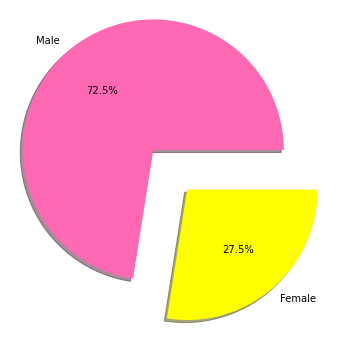

In [58]:
#sex rate
plt.figure(figsize=(10,6))
labels=['Male', 'Female']
explode=[.2,.2]
mycolors = ["hotpink", "Yellow"]
sizes=olympics.Sex.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True,colors = mycolors)
plt.show()

### From the Gender Distribution of the Athletes graph, we can confirm Men as the prevailing Gender with the highest participation rates whit almost 200k Athletes in contrast to Women with 75k Athletes over the 120 years of the Olympic Games.

## Seasons Rate

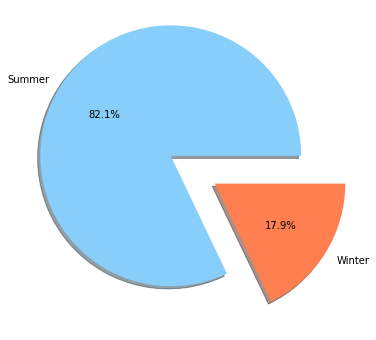

In [59]:

plt.figure(figsize=(10,6))
labels=olympics.Season.value_counts().index
explode=[0.2,0.2]
mycolors = ["#87CEFA", "#FF7F50"]
sizes=olympics.Season.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True,colors = mycolors)
plt.show()

### 82.1%  of games played in the summer season and 17.9% games played in winter season in the Olympics 

## What games are played in summer and winter

In [60]:
olympics[olympics.Season == 'Winter'].Event.unique()  

array(["Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Ice Hockey Men's Ice Hockey",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Alpine Skiing Men's Downhill", "Alpine Skiing Men's Super G",
       "Alpine Skiing Men's Giant Slalom", "Alpine Skiing Men's Slalom",
       "Alpine Skiing Men's Combined", "Speed Skating Men's 500 metres",
       "Speed Skating Men's 1,500 metres", "Luge Women's Singles",
       "Bobsleigh Men's Four", "Speed Skating Men's 5,000 metres",
       "Speed Skating Men's 10,000 metres",
       "Cross Country Skiing Men's 15 kilometres",
       "Alpine Skiing Women's Slalom", "Figure Skating Men's Singles",
       'Figure Skating Mixed Team

In [61]:
olympics[olympics.Season == 'Summer'].Event.unique()  

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [62]:
winter_sports = olympics[olympics.Season == 'Winter'].Sport.unique() 
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [63]:
summer_sports = olympics[olympics.Season == 'Summer'].Sport.unique()  
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### This is the game that has been played in the summer :['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics','Swimming', 'Badminton', 'Sailing', 'Gymnastics','Art Competitions', 'Handball', 'Weightlifting', 'Wrestling','Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism','Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing','Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery','Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball','Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining','Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo','Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet','Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota','Alpinism', 'Aeronautics']

### This is the game that has been played in the Winter :['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon','Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating','Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling','Snowboarding', 'Short Track Speed Skating', 'Skeleton','Military Ski Patrol', 'Alpinism']

# Women in Athletics

### Studying the data we can try to understand how much medals we have only for women in the recent history of the Summer Games. Let’s create a filtered dataset :

In [64]:
womenInOlympics = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Summer')]
womenInOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00000,70.702393,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands
32,13,Minna Maarit Aalto,F,30.0,159.00000,55.500000,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland
33,13,Minna Maarit Aalto,F,34.0,159.00000,55.500000,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.00000,70.702393,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway
80,22,Andreea Aanei,F,22.0,170.00000,125.000000,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania
91,29,Willemien Aardenburg,F,22.0,175.33897,70.702393,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands
105,37,Ann Kristin Aarnes,F,23.0,182.00000,64.000000,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway
135,49,Moonika Aava,F,24.0,168.00000,65.000000,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,Estonia
136,49,Moonika Aava,F,28.0,168.00000,65.000000,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN,Estonia


### To plot the curve over time, let’s create a plot in which we put the year (on the x-axis) and count of the number of medals per edition of the games (consider that we will have more medals for the same athlete).

Text(0.5, 1.0, 'Women medals per edition of the Games')

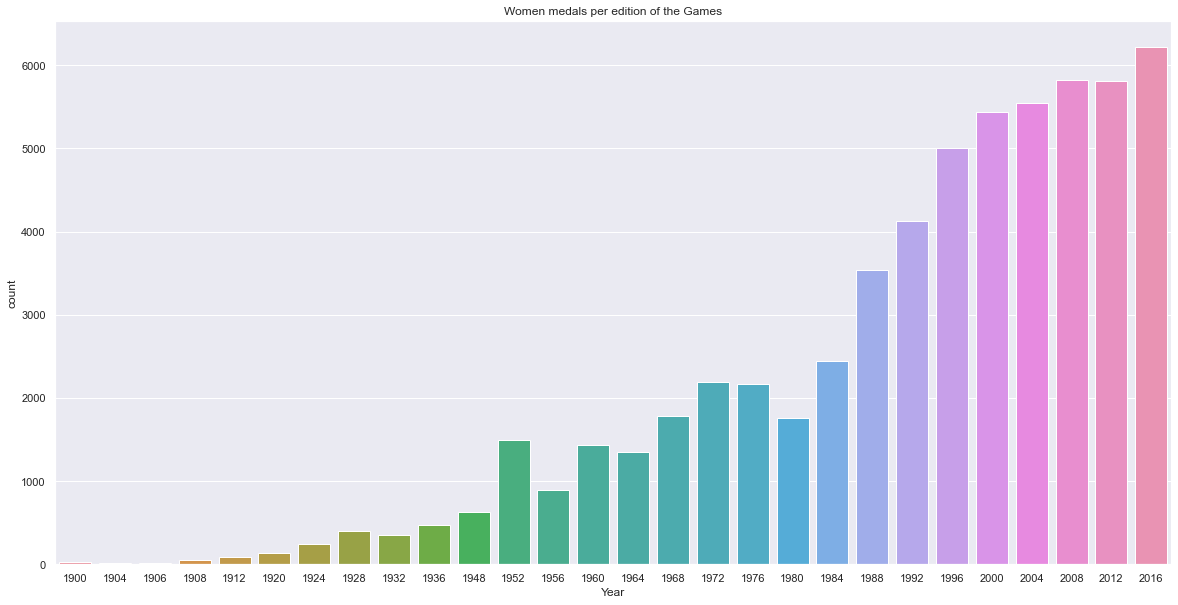

In [65]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

In [66]:
#top participanting

In [67]:
participants = olympics.Name.value_counts()
top_partic_olympics = participants[:15]
top_partic_olympics

Robert Tait McKenzie                58
Heikki Ilmari Savolainen            39
Joseph "Josy" Stoffel               38
Ioannis Theofilakis                 36
Takashi Ono                         33
Jean Lucien Nicolas Jacoby          32
Alfrd (Arnold-) Hajs (Guttmann-)    32
Alexandros Theofilakis              32
Andreas Wecker                      32
Michel Mathiot                      31
Johann "Hans" Sauter                31
Alfred August "Al" Jochim           31
Alfred James Munnings               31
Yordan Yovchev Yovchev              30
Karl Tore William Thoresson         30
Name: Name, dtype: int64

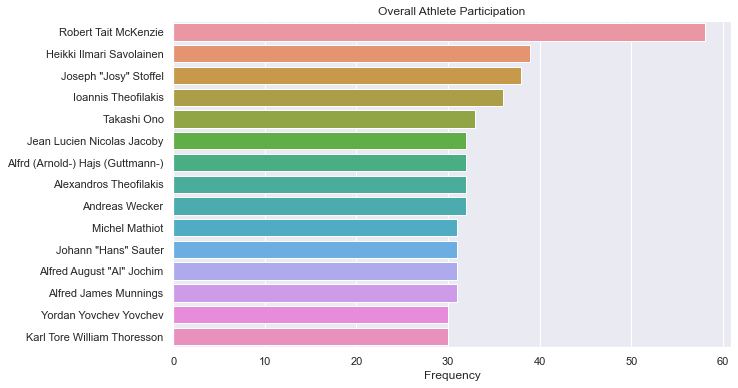

In [68]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=top_partic_olympics.index, x=top_partic_olympics)
ax.set_title('Overall Athlete Participation')
ax.set_xlabel('Frequency');

In [69]:
olympics[olympics.Name == 'Robert Tait McKenzie'].groupby(['Games','Event'])[['ID','Medal']].count()

ID  Medal
Games       Event                                                        
1912 Summer Art Competitions Mixed Sculpturing                   1      0
1928 Summer Art Competitions Mixed Sculpturing, Statues          7      0
1932 Summer Art Competitions Mixed Sculpturing, Medals And ...   1      1
            Art Competitions Mixed Sculpturing, Unknown Event   43      0
1936 Summer Art Competitions Mixed Sculpturing, Medals           1      0
            Art Competitions Mixed Sculpturing, Unknown Event    4      0
1948 Summer Art Competitions Mixed Sculpturing, Unknown Event    1      0

In [70]:
olympics[olympics.Name == 'Robert Tait McKenzie'].Medal.value_counts()

Bronze    1
Name: Medal, dtype: int64

In [71]:
olympics[olympics.Name == 'Heikki Ilmari Savolainen'].groupby(['Games','Event','Medal'])[['ID','Medal']].count()

ID  Medal
Games       Event                                  Medal            
1928 Summer Gymnastics Men's Pommelled Horse       Bronze   1      1
1932 Summer Gymnastics Men's Horizontal Bar        Silver   1      1
            Gymnastics Men's Individual All-Around Bronze   1      1
            Gymnastics Men's Parallel Bars         Bronze   1      1
            Gymnastics Men's Team All-Around       Bronze   1      1
1936 Summer Gymnastics Men's Team All-Around       Bronze   1      1
1948 Summer Gymnastics Men's Pommelled Horse       Gold     1      1
            Gymnastics Men's Team All-Around       Gold     1      1
1952 Summer Gymnastics Men's Team All-Around       Bronze   1      1

In [72]:
olympics[olympics.Name == 'Heikki Ilmari Savolainen'].Medal.value_counts()

Bronze    6
Gold      2
Silver    1
Name: Medal, dtype: int64

In [73]:
# modern olympics participation
recent_olympics_part = olympics[olympics.Year >= 2006].Name.value_counts()[:15]
recent_olympics_part

Kohei Uchimura                           21
Michael Fred Phelps, II                  21
Marcel Van Minh Phuc Long Nguyen         20
Fabian Hambchen                          18
Flavius Koczi                            16
Tora Berger (-Tveldal)                   16
Marit Bjrgen                             16
Sarah Frederica Sjstrm                   16
Krystyna Stanisawa Paka (-Guzik)         16
Oleh Yuriyovych Verniaiev                16
Yelena Vladimirovna Kolomina             16
Ole Einar Bjrndalen                      16
Kim Su-Myeon                             15
Aino-Kaisa Saarinen                      15
Olga Alekseyevna Zaytseva (-Augustin)    15
Name: Name, dtype: int64

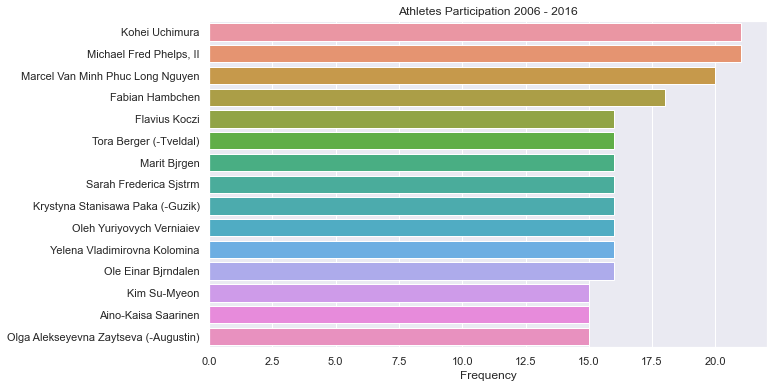

In [74]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=recent_olympics_part.index, x=recent_olympics_part)
ax.set_title('Athletes Participation 2006 - 2016')
ax.set_xlabel('Frequency');

## Medal awarding by Gender

In [75]:
male_medals1 = olympics.query('Sex == "M"').Medal.value_counts()
female_medals1 = olympics.query('Sex == "F"').Medal.value_counts()

In [76]:
male_medals1

Gold      9625
Bronze    9524
Silver    9381
Name: Medal, dtype: int64

In [77]:
female_medals1

Bronze    3771
Gold      3747
Silver    3735
Name: Medal, dtype: int64

In [78]:
male_medals = olympics.query('Sex == "M"').Medal.count()
female_medals = olympics.query('Sex == "F"').Medal.count()


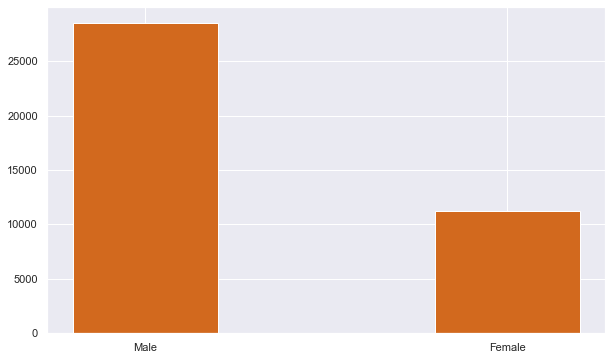

In [79]:
plt.figure(figsize=(10,6))
plt.bar(x=['Male','Female'], height=[male_medals,female_medals], width=0.4 ,color = "#D2691E");

<AxesSubplot:xlabel='Sex', ylabel='count'>

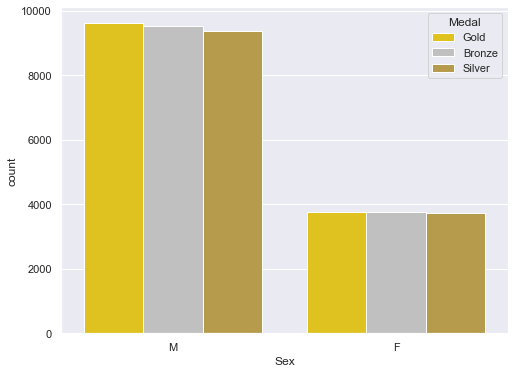

In [80]:
fig, ax = plt.subplots(figsize=(8,6))
color= ()
sns.countplot(x="Sex", hue="Medal", data=olympics,palette= ["#FFD700","#C0C0C0", "#C7A43C"],ax=ax)

### Here we can analyze that men have won more medals than women and men have won 9625 gold medals,9524 bronze medals, and 9381 silver medals and women have won 3771 bronze medals, 3747 gold medals, and 3735 silver medal. 

In [81]:
# Top Decorated Teams

# Medals per country

### Let’s now review the top 15  medal countries:

In [82]:
top_medal_teams = olympics.groupby('Team').Medal.count().reset_index(name='Count').sort_values(by='Count', ascending=False).head(15)
top_medal_teams

,Team,Count
1095,United States,5219
976,Soviet Union,2451
398,Germany,1984
412,Great Britain,1673
361,France,1550
506,Italy,1527
1010,Sweden,1434
65,Australia,1306
173,Canada,1243
476,Hungary,1127


Text(0.5, 0, 'Frequency')

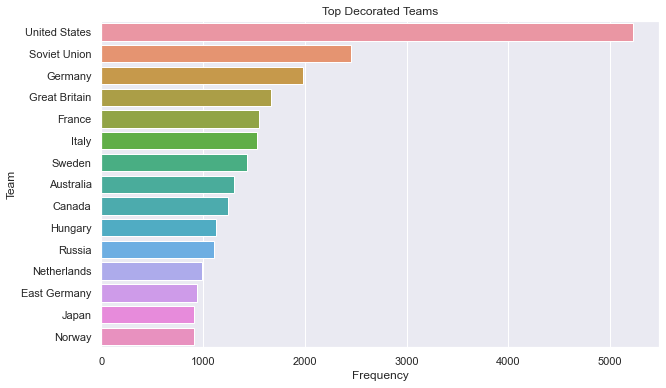

In [83]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=top_medal_teams.Team, x=top_medal_teams.Count)
ax.set_title('Top Decorated Teams')
ax.set_xlabel('Frequency')

### The USA seems to be the most winning country.

## Top 15 Countries with the highest number participated in the Games

In [84]:
top_partic = olympics.Team.value_counts().reset_index(name='Count')
top_partic.rename({'index':'Team'},axis=1,inplace=True)
top_partic_teams = top_partic.head(15)
top_partic_teams

,Team,Count
0,United States,17847
1,France,11988
2,Great Britain,11404
3,Italy,10260
4,Germany,9326
5,Canada,9279
6,Japan,8289
7,Sweden,8052
8,Australia,7513
9,Hungary,6547


Text(0.5, 0, 'Frequency')

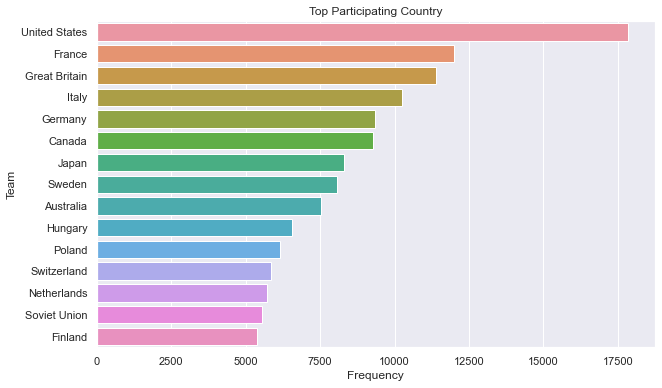

In [85]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_partic_teams, y= 'Team', x= 'Count')
ax.set_title('Top Participating Country')
ax.set_xlabel('Frequency')

### Evaluating closely the characteristics of the games, countries such as USA, France, Great Britain, Italy, Canada, Germany, Japan, Sweden, Australia and Hungary, where in the top ten countries with the highest number of participants, going from over 175k to 6k athletes.

## win % by countary

In [86]:
top_teams_index = top_medal_teams.merge(top_partic_teams, how='inner', on='Team')
top_teams_index.rename(columns={'Count_x':'Medals','Count_y':'Paricipates'}, inplace=True)
top_teams_index['Decoration_Index'] = top_teams_index['Medals'] / top_teams_index['Paricipates']
decoration_index = top_teams_index.sort_values('Decoration_Index',ascending=False)
decoration_index

,Team,Medals,Paricipates,Decoration_Index
1,Soviet Union,2451,5535,0.442818
0,United States,5219,17847,0.292430
2,Germany,1984,9326,0.212739
6,Sweden,1434,8052,0.178092
7,Australia,1306,7513,0.173832
10,Netherlands,988,5718,0.172788
9,Hungary,1127,6547,0.172140
5,Italy,1527,10260,0.148830
3,Great Britain,1673,11404,0.146703
8,Canada,1243,9279,0.133958


In [87]:
top_teams_index = top_medal_teams.merge(top_partic_teams, how='inner', on='Team')

In [88]:
top_teams_index

,Team,Count_x,Count_y
0,United States,5219,17847
1,Soviet Union,2451,5535
2,Germany,1984,9326
3,Great Britain,1673,11404
4,France,1550,11988
5,Italy,1527,10260
6,Sweden,1434,8052
7,Australia,1306,7513
8,Canada,1243,9279
9,Hungary,1127,6547


In [89]:
top_teams_index.rename(columns={'Count_x':'Medals','Count_y':'Paricipates'}, inplace=True)

In [90]:
top_teams_index

,Team,Medals,Paricipates
0,United States,5219,17847
1,Soviet Union,2451,5535
2,Germany,1984,9326
3,Great Britain,1673,11404
4,France,1550,11988
5,Italy,1527,10260
6,Sweden,1434,8052
7,Australia,1306,7513
8,Canada,1243,9279
9,Hungary,1127,6547


In [91]:
top_teams_index['Win % by country'] = (top_teams_index['Medals'] / top_teams_index['Paricipates'])*100

In [92]:
decoration_index = top_teams_index.sort_values('Win % by country',ascending=False)
decoration_index

,Team,Medals,Paricipates,Win % by country
1,Soviet Union,2451,5535,44.281843
0,United States,5219,17847,29.243010
2,Germany,1984,9326,21.273858
6,Sweden,1434,8052,17.809240
7,Australia,1306,7513,17.383202
10,Netherlands,988,5718,17.278769
9,Hungary,1127,6547,17.213991
5,Italy,1527,10260,14.883041
3,Great Britain,1673,11404,14.670291
8,Canada,1243,9279,13.395840


In [93]:
decoration_index

,Team,Medals,Paricipates,Win % by country
1,Soviet Union,2451,5535,44.281843
0,United States,5219,17847,29.243010
2,Germany,1984,9326,21.273858
6,Sweden,1434,8052,17.809240
7,Australia,1306,7513,17.383202
10,Netherlands,988,5718,17.278769
9,Hungary,1127,6547,17.213991
5,Italy,1527,10260,14.883041
3,Great Britain,1673,11404,14.670291
8,Canada,1243,9279,13.395840


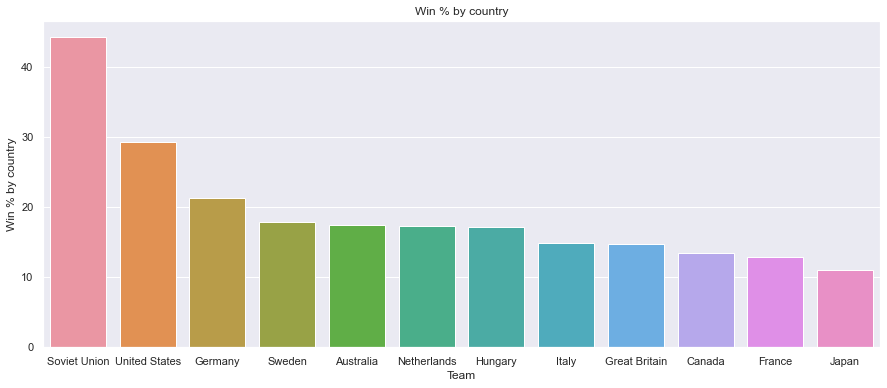

In [136]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=decoration_index, y= 'Win % by country', x='Team')
ax.set_title('Win % by country');


### We can see here that 5535 participated from the Soviet Union and won 2451 medals, so their winning percentage is 44.28% , followed by the United States, Sweden, Australia ,Netherlands ,Hungary,Italy, Great Britain, Canada ,France .

#  INDIA

In [95]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [96]:
india = olympics[(olympics.NOC == 'IND')].reset_index().drop(columns = 'index')
india.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India
1,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India
2,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India
3,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India
4,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India


In [97]:
india.Sex.value_counts().index

Index(['M', 'F'], dtype='object')

In [98]:
india.Sex.value_counts().values

array([1167,  241], dtype=int64)

## Gender Distribution of the Athletes in India

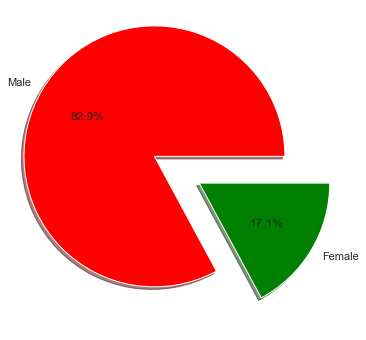

In [99]:
#sex rate
plt.figure(figsize=(10,6))
labels=['Male','Female']
explode=[.2,.2]

mycolors = ["red", "green"]
sizes=india.Sex.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True, colors = mycolors)
plt.show()

### From the Gender Distribution of the Athletes in india, we can confirm Men as the prevailing Gender with the highest participation rates whit almost 1167 Athletes in contrast to Women with 241 Athletes over the 120 years of the Olympic Games.

## Top 15 players by the athletes in the india  with the highest numbers of participants

In [137]:
india_participants = india.Name.value_counts()
top_partic_india = india_participants[:10]
top_partic_india

Anant Ram              15
Leander Adrian Paes    11
Gagan Narang           10
Jagmal More             8
Bandu Bhosle            8
Vithal Karande          8
Trilok Singh            8
Darshan Mondal          8
Vir Singh               7
Sham Lal                7
Name: Name, dtype: int64

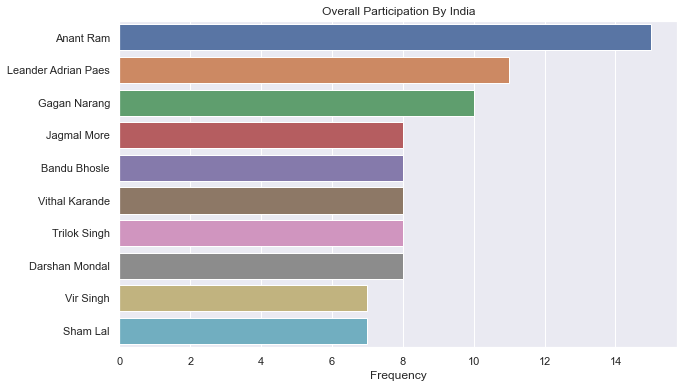

In [138]:
plt.figure(figsize=(10,6))
ax = sns.barplot(y=top_partic_india.index, x=top_partic_india)
ax.set_title('Overall Participation By India')
ax.set_xlabel('Frequency');

### From India's side, Anant Ram has participated the maximum number(15) of times, after that Leander Adrian Paes has participated 11 times and Gagan 10 times, Trilok Singh has 8 times, Jagmal, Vital, Bandu also 8 times and Sham Singh, Khushi ram, Karni Singh, Pritam Singh, Shyam all, Veer Singh has participated seven times.

In [102]:
india[india.Name == 'Anant Ram'].groupby(['Games','Event'])[['ID','Medal']].count()

ID  Medal
Games       Event                                            
1956 Summer Gymnastics Men's Floor Exercise          1      0
            Gymnastics Men's Horizontal Bar          1      0
            Gymnastics Men's Horse Vault             1      0
            Gymnastics Men's Individual All-Around   1      0
            Gymnastics Men's Parallel Bars           1      0
            Gymnastics Men's Pommelled Horse         1      0
            Gymnastics Men's Rings                   1      0
1964 Summer Gymnastics Men's Floor Exercise          1      0
            Gymnastics Men's Horizontal Bar          1      0
            Gymnastics Men's Horse Vault             1      0
            Gymnastics Men's Individual All-Around   1      0
            Gymnastics Men's Parallel Bars           1      0
            Gymnastics Men's Pommelled Horse         1      0
            Gymnastics Men's Rings                   1      0
            Gymnastics Men's Team All-Around         1      0

## Medals win by men/women in india

In [103]:
male_medals3 = india.query('Sex == "M"').Medal.value_counts()
female_medals3 = india.query('Sex == "F"').Medal.value_counts()

In [104]:
male_medals3

Gold      138
Bronze     36
Silver     18
Name: Medal, dtype: int64

In [105]:
female_medals3

Bronze    4
Silver    1
Name: Medal, dtype: int64

In [106]:
male_medals4 = india.query('Sex == "M"').Medal.count()
female_medals4 = india.query('Sex == "F"').Medal.count()

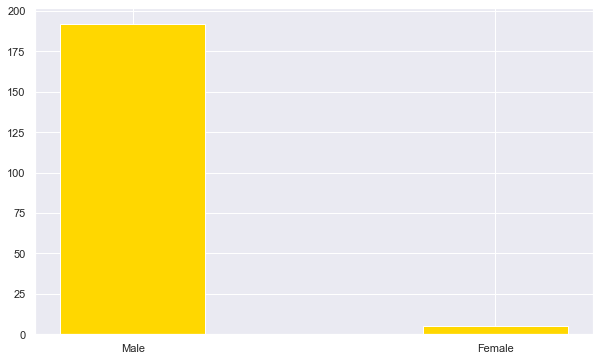

In [107]:
plt.figure(figsize=(10,6))
plt.bar(x=['Male','Female'], height=[male_medals4,female_medals4], width=0.4,color = '#FFD700');

<AxesSubplot:xlabel='Sex', ylabel='count'>

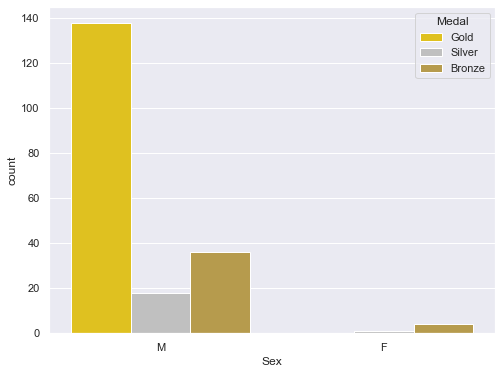

In [108]:
fig, ax = plt.subplots(figsize=(8,6))
color= ()
sns.countplot(x="Sex", hue="Medal", data=india,palette= ["#FFD700","#C0C0C0", "#C7A43C"],ax=ax)

### Here we can see that in India men have won more medals than women, men have won 138 gold medals, 36 bronze medals and 18 silver medals and women have won 4 bronze medals and 1 silver medal.

## Most medal winners in India

In [109]:
top_medal_player = india.groupby('Name').Medal.count().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)
top_medal_player

,Name,Count
411,Leslie Walter Claudius,4
835,Udham Singh Kular,4
95,"Balbir Singh Dosanjh, Sr.",3
264,Harbinder Singh Chimni,3
641,Richard James Allen,3
624,Ranganathan Francis,3
622,Randhir Singh Gentle,3
94,Balbir Singh,3
848,"Victor John ""V. J."" Peter",3
191,Dhyan Chand Bais,3


Text(0.5, 0, 'Frequency')

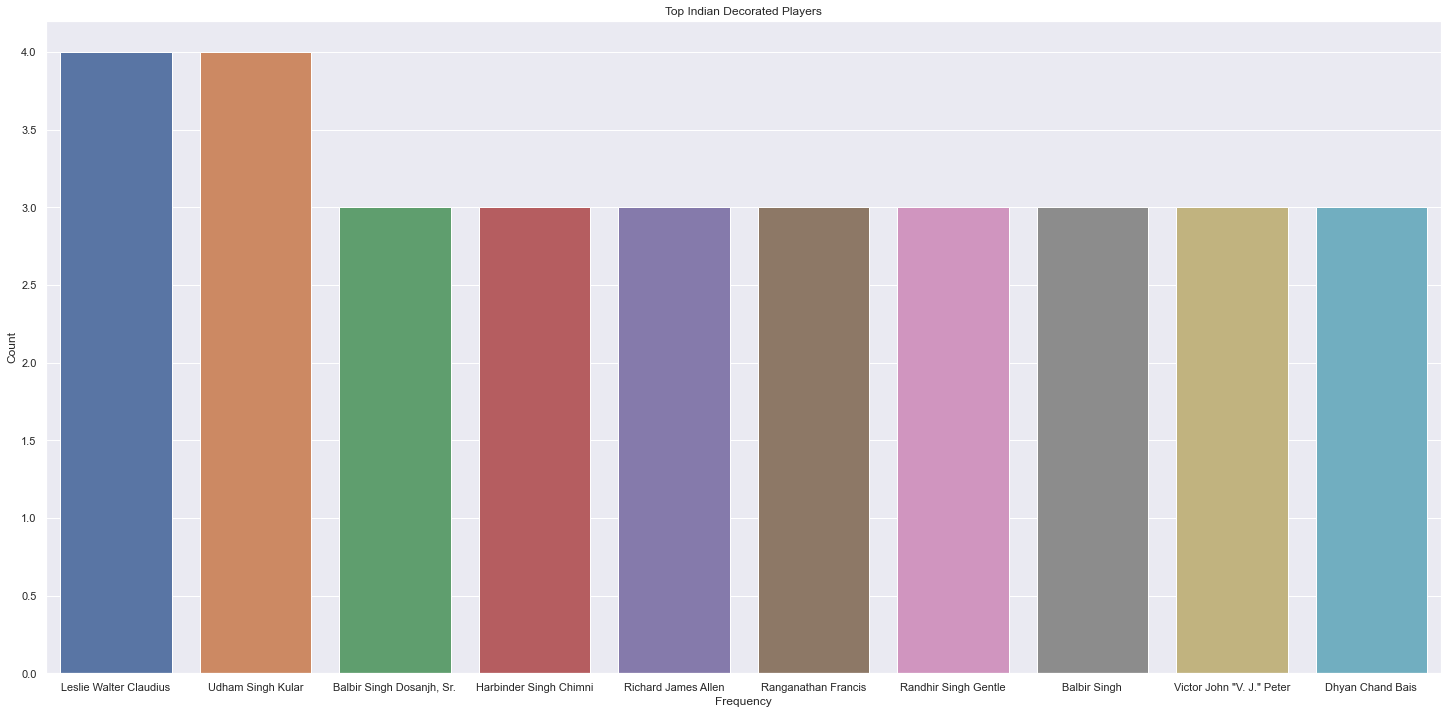

In [110]:
plt.figure(figsize=(25,12))
ax = sns.barplot(x=top_medal_player.Name, y=top_medal_player.Count)
ax.set_title('Top Indian Decorated Players')
ax.set_xlabel('Frequency')

### Leslie Walter Claudius and Udham Singh Kular have won 4-4 medals in India and Balbir Singh, Harvinder Singh, Randhir, Balveer, Victor Dhyan Chand, Shankar won 3 medals in India.

In [111]:
a11=india['Age'].describe()

In [112]:
a11

count    1408.000000
mean       25.548675
std         4.929759
min        15.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        66.000000
Name: Age, dtype: float64

count    1408.000000
mean       25.548675
std         4.929759
min        15.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        66.000000
Name: Age, dtype: float64

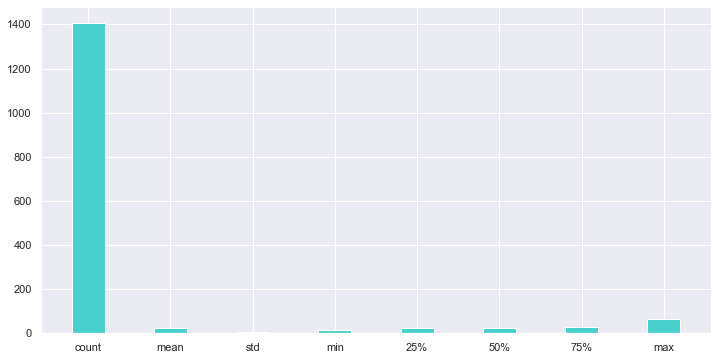

In [113]:
plt.figure(figsize=(12,6))
plt.bar(x=a11.index, height=a11.values, width=0.4 ,color = "#48D1CC");
a11

### We can understand from this graph that 1408 players participated from India side, their average age is 25 years, minimum age is 15 years and maximum age is 66 years.

In [114]:
a12=india['Height'].describe()

In [115]:
a12

count    1408.000000
mean      172.997335
std         7.848213
min       137.000000
25%       170.000000
50%       175.338970
75%       175.338970
max       200.000000
Name: Height, dtype: float64

count    1408.000000
mean      172.997335
std         7.848213
min       137.000000
25%       170.000000
50%       175.338970
75%       175.338970
max       200.000000
Name: Height, dtype: float64

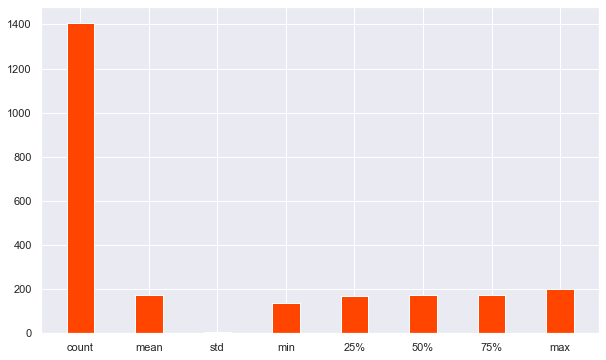

In [116]:
plt.figure(figsize=(10,6))
plt.bar(x=a12.index, height=a12.values, width=0.4 ,color = "#FF4500");
a12

### The average height of the players participating from India is 172 cms and the minimum height is 137 cms and the maximum height is 200 cms.

In [117]:
a1=india['Weight'].describe()

In [118]:
a1

count    1408.000000
mean       68.885007
std        11.364346
min        43.000000
25%        62.750000
50%        70.702393
75%        70.702393
max       125.000000
Name: Weight, dtype: float64

count    1408.000000
mean       68.885007
std        11.364346
min        43.000000
25%        62.750000
50%        70.702393
75%        70.702393
max       125.000000
Name: Weight, dtype: float64

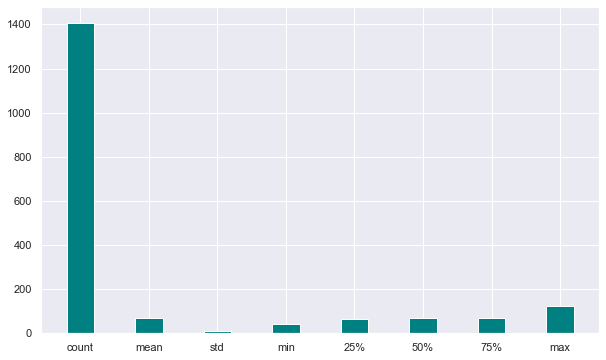

In [119]:
plt.figure(figsize=(10,6))
plt.bar(x=a1.index, height=a1.values, width=0.4 ,color = "#008080");
a1

### The average width of the players participating from India is 68 cm and the minimum width is 43 cms and the maximum width is 125 cm.

In [120]:
india.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India
1,281,S. Abdul Hamid,M,25.556898,175.33897,70.702393,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India
2,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India
3,512,Shiny Kurisingal Abraham-Wilson,F,19.000000,167.00000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India
4,512,Shiny Kurisingal Abraham-Wilson,F,23.000000,167.00000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India


In [121]:
y1 = india.groupby(['Year'])[['ID','Medal']].count()
y1.sort_values('Year',ascending=False)

,ID,Medal
Year,,
2016,130,2
2014,2,0
2012,95,6
2010,3,0
2008,67,3
2006,5,0
2004,81,1
2002,1,0
2000,70,1


In [122]:
y2 = india.groupby(['Name'])[['ID','Medal']].count()
y2.sort_values('Name',ascending=False)

,ID,Medal
Name,,
Zora Singh,2,0
Zafar Iqbal,2,1
Yogeshwar Dutt,4,1
William Xalco,1,0
"William Patrick ""Pat"" Sullivan",1,1
...,...,...
Abhinav Bindra,5,1
Abha Dhillan,1,0
A. Sattar Basheer,1,0


In [123]:
sk = india[['Name','Year','Event','Medal']]

In [124]:
sk.sort_values('Year').reset_index().drop(columns = 'index').head(10)

,Name,Year,Event,Medal
0,Norman Gilbert Pritchard (-Trevor),1900,Athletics Men's 200 metres,Silver
1,Norman Gilbert Pritchard (-Trevor),1900,Athletics Men's 200 metres Hurdles,Silver
2,Norman Gilbert Pritchard (-Trevor),1900,Athletics Men's 100 metres,NaN
3,Norman Gilbert Pritchard (-Trevor),1900,Athletics Men's 60 metres,NaN
4,Norman Gilbert Pritchard (-Trevor),1900,Athletics Men's 110 metres Hurdles,NaN
5,Purma C. Bannerjee,1920,Athletics Men's 400 metres,NaN
6,Kumar T. Navale,1920,"Wrestling Men's Middleweight, Freestyle",NaN
7,Purma C. Bannerjee,1920,Athletics Men's 100 metres,NaN
8,Duikar Randhir Shindes,1920,"Wrestling Men's Featherweight, Freestyle",NaN
9,Phadeppa Dareppa Chaugule,1920,"Athletics Men's 10,000 metres",NaN


In [125]:
india[india.Name=='Abhinav Bindra']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
125,11601,Abhinav Bindra,M,17.0,173.0,70.0,India,IND,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India
126,11601,Abhinav Bindra,M,21.0,173.0,70.0,India,IND,2004 Summer,2004,Summer,Athina,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India
127,11601,Abhinav Bindra,M,25.0,173.0,70.0,India,IND,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,India
128,11601,Abhinav Bindra,M,29.0,173.0,70.0,India,IND,2012 Summer,2012,Summer,London,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India
129,11601,Abhinav Bindra,M,33.0,173.0,70.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Men's Air Rifle, 10 metres",NaN,India


# Variation of male/female athletes over time (Summer Games) *

### We will now create two dataframes dividing the population of our dataset using Sex and Season                      (we would like to review only the summer games)

In [126]:
MenOverTime = olympics[(olympics.Sex == 'M') & (olympics.Season == 'Summer')]
WomenOverTime = olympics[(olympics.Sex == 'F') & (olympics.Season == 'Summer')]

### Done, let’s check the head of one of the new dataframes to see the result:

In [127]:
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,175.33897,70.702393,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland


### Okay, at this time we are ready to create the plots. The first one is for men, the second for women:

Text(0.5, 1.0, 'Variation of Male Athletes over time')

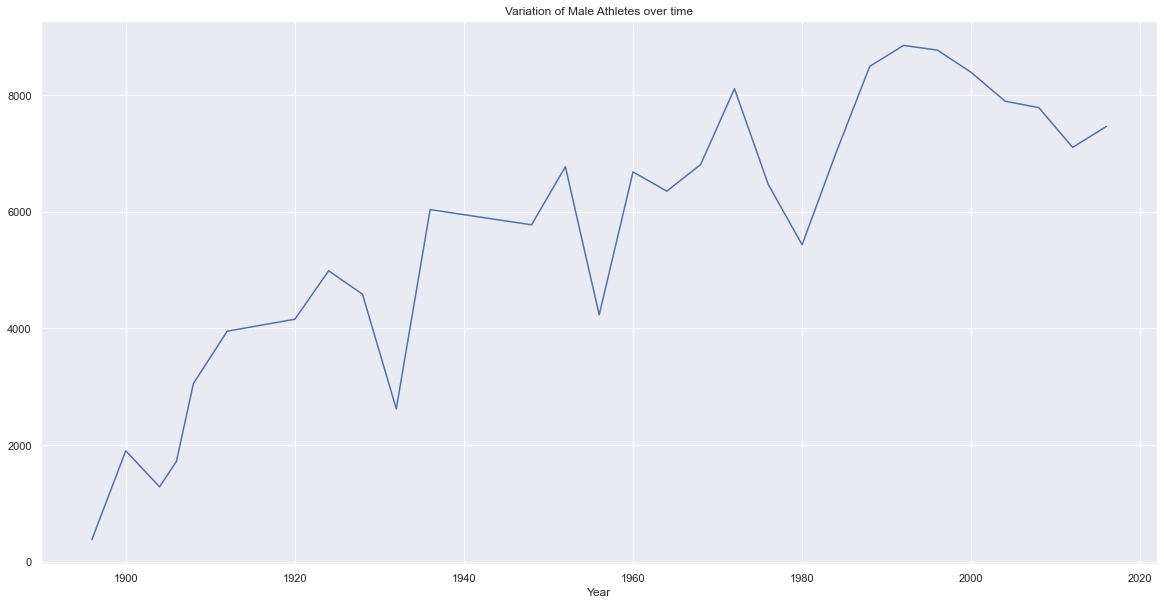

In [128]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

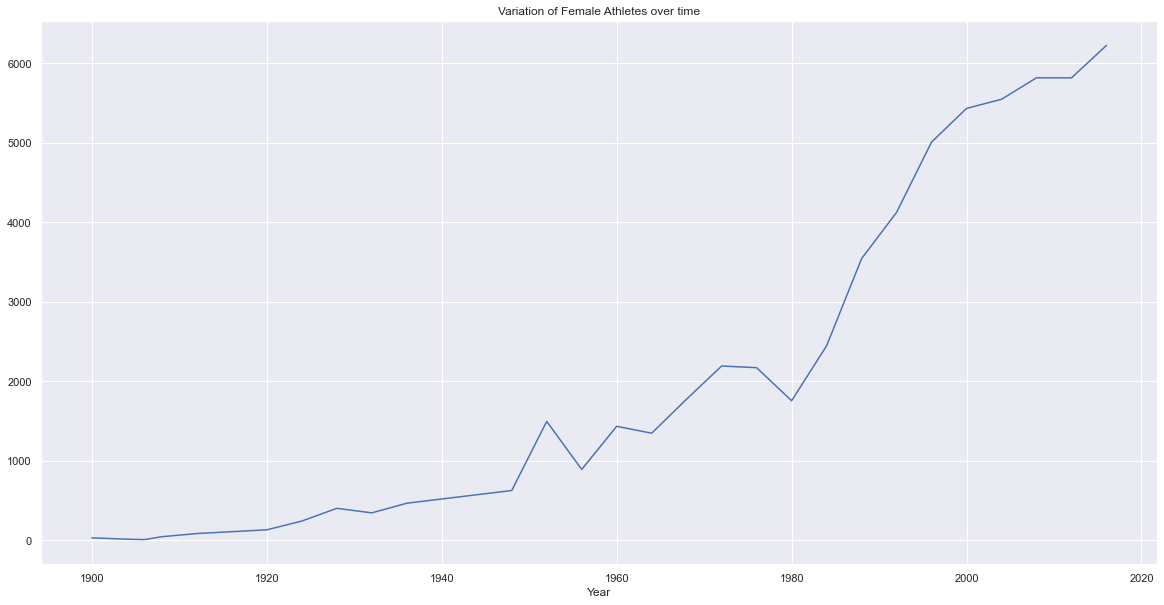

In [129]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

## What I immediately saw is that for women:

### 1. We have a steep increase in the population;
### 2. The grow is constant.

## On the other hand, the grow for men seems less strong:

### 1.  After the 1990 we can see a relevant decrease in the number of male athletes at the summer games;
###  2. The growth has slowly restarted recently.

## It's clearly evident from the above stacked  that the participation of women players in the olympics has significantly improved over the years. 

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

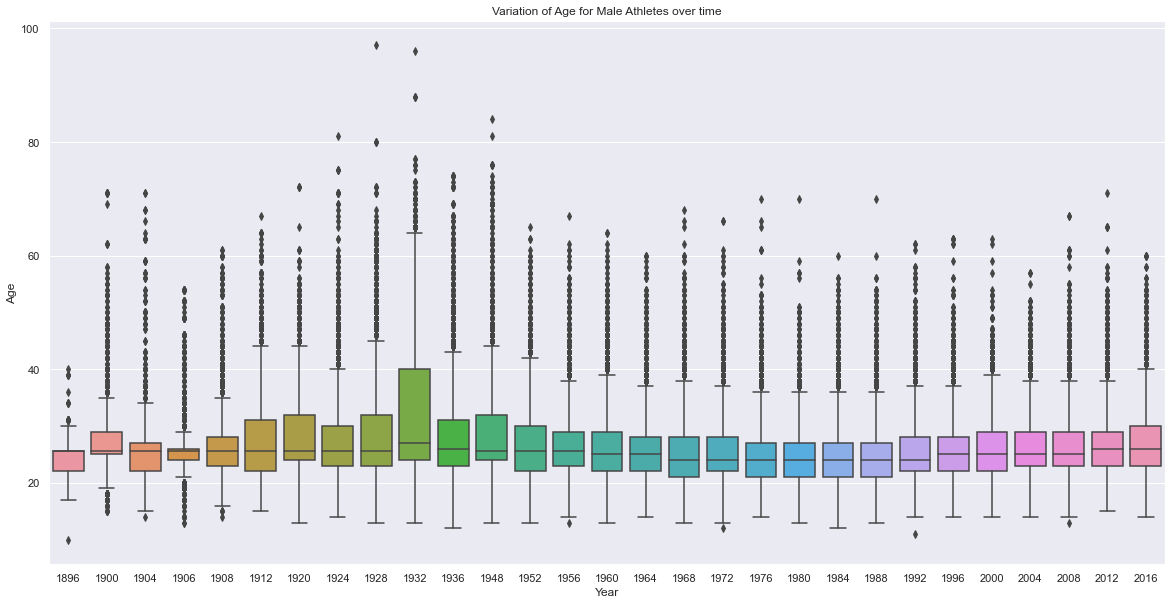

In [130]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

## Let’s create a sliced dataframe including only male athletes from India

In [131]:
itMenOverTime = MenOverTime.loc[MenOverTime['region'] == 'India']

### Okay, now we can plot the change over time:

Text(0.5, 1.0, 'Variation of Age for Indian Male Athletes over time')

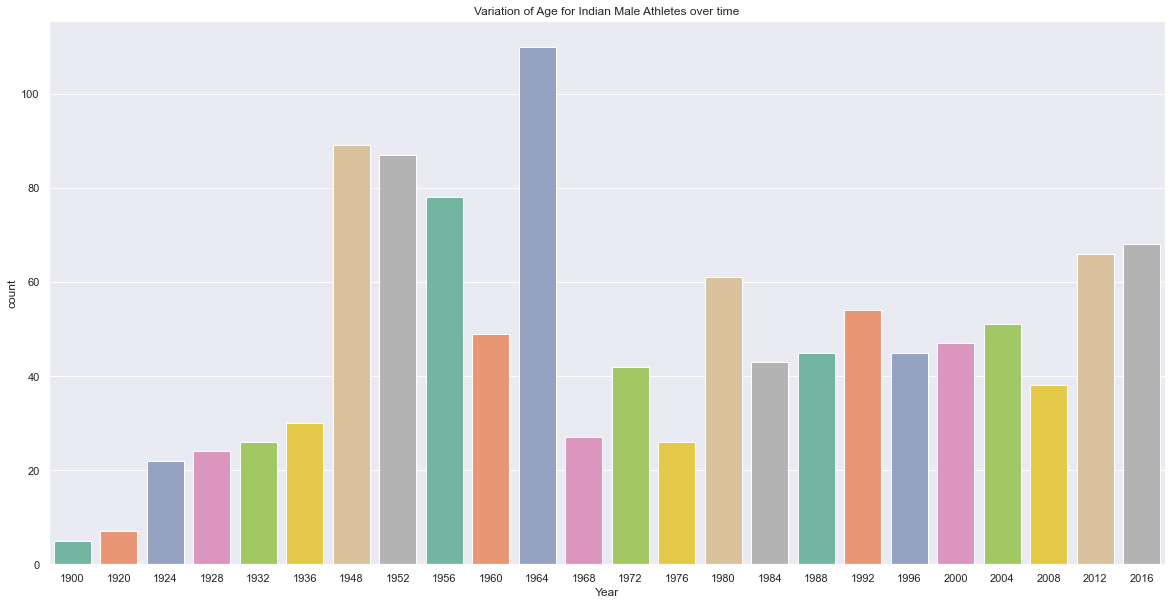

In [132]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itMenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Male Athletes over time')

## Okay, we can quickly do the same operation for women:

Text(0.5, 1.0, 'Variation of Age for Indian Female Athletes over time')

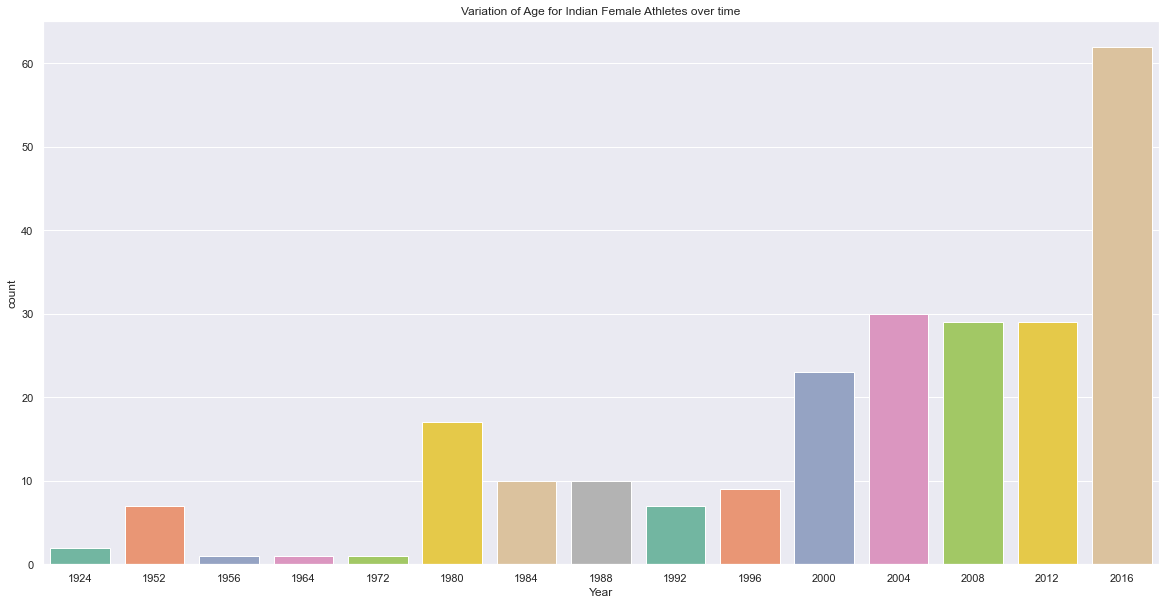

In [133]:
itWomenOverTime = WomenOverTime.loc[WomenOverTime['region'] == 'India']
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=itWomenOverTime, palette='Set2')
plt.title('Variation of Age for Indian Female Athletes over time')

## Conclusion


### In this perspective, we come back to the original question, What can 120 years of Olympic history tell us about the Games? Well, they can tell us a lot.

### Firstly, that the Olympic Games have been led by Male Athletes, but we can see that year after years that women start to be more involved. Furthermore, athletes independently of their gender are the most involved in the Games in their mid-twenties and Summer Season is the event with more games, so that influences number of countries and athletes either winning or participating in the Olympics.

### Countries such as USA, Italy and Japan are in the Top 10 of countries with more participants and sports like Athletics, Gymnastics and Fencing are the most popular within the Athletes and all over the years.

### From India side Men as the prevailing Gender with the highest participation rates whit almost 1167 Athletes in contrast to Women with 241 Athletes over the 120 years of the Olympic Games.
### Leslie Walter Claudius and Udham Singh Kular have won 4-4 medals in India and Balbir Singh, Harbinder Singh, Randhir Singh, Balbir Singh, Victor , Dhyan Chand and  Shankar won 3 medals in India.
### India has won the maximum 130 gold medals in hockey, 7 in Alpinism and one gold medal in Shooting.
